In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Dense, Flatten, Activation, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import cv2 as cv
import random
import os
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [ ]:
DIRECTORY = '/content/drive/MyDrive/dataset'
# a raw string(r'...') is used to treat backslash(\) as a normal character
CATEGORIES = ['mammooty','mohanlal']
num_classes = len(CATEGORIES)

In [ ]:
IMG_SIZE = 224

data = []

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        label = CATEGORIES.index(category)
        #print(label)
        img_arr = cv.imread(img_path)
        img_arr = cv.resize(img_arr,(IMG_SIZE,IMG_SIZE))
        #print(img_arr)
        data.append([img_arr,label])
        #labelling the data


In [ ]:
# to shuffle the data
random.shuffle(data)

In [ ]:
X = []
y = []

for features, labels in data:
    X.append(features)
    y.append(labels)

In [ ]:
# changed X & y into arrays and stored it in respective variables
X = np.array(X)
y = np.array(y)

In [ ]:
X = X/255

In [ ]:
IMAGE_SIZE = [224, 224]
inception = InceptionV3(input_shape = (224,224,3), weights = 'imagenet', include_top = False)  # input_shape = (64,64,3) as required by VGG

# this will exclude the initial layers from training phase as there are already been trained.
for layer in inception.layers:
    layer.trainable = False

x = Flatten()(inception.output)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(1, activation = 'sigmoid')(x)  # adding the output layer with softmax function as this is a multi label classification problem.

modeli = Model(inputs = inception.input, outputs = x)

modeli.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
modeli.fit(X,y,epochs = 5,validation_split = 0.2 )

Epoch 1/5
26/26 [==============================] - 21s 264ms/step - loss: 5.0454 - accuracy: 0.6563 - val_loss: 0.5942 - val_accuracy: 0.8308
Epoch 2/5
26/26 [==============================] - 2s 95ms/step - loss: 0.4953 - accuracy: 0.8979 - val_loss: 0.2123 - val_accuracy: 0.9204
Epoch 3/5
26/26 [==============================] - 2s 94ms/step - loss: 0.1049 - accuracy: 0.9639 - val_loss: 0.1155 - val_accuracy: 0.9552
Epoch 4/5
26/26 [==============================] - 2s 86ms/step - loss: 0.0540 - accuracy: 0.9801 - val_loss: 0.1129 - val_accuracy: 0.9652
Epoch 5/5
26/26 [==============================] - 2s 86ms/step - loss: 0.0250 - accuracy: 0.9913 - val_loss: 0.0992 - val_accuracy: 0.9701


In [ ]:
modeli.save("inception.model", save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import keras
modelv = keras.models.load_model('/content/drive/MyDrive/inception.model')

In [ ]:
import cv2
CATEGORIES = ['mammooty', 'mohanlal']
def image(path):
    image = cv2.imread(path)
    #plt.imshow(image)
    resize_img = image[0:200,10:200]
    new_arr = cv2.resize(resize_img, (224, 224))
    plt.imshow(new_arr)
    #print(new_arr)
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(-1,224,224,3)
    #print(new_arr)
    return new_arr

#preprocessing the user input

1/1 [==============================] - 0s 26ms/step
mamooty
[[1.]]


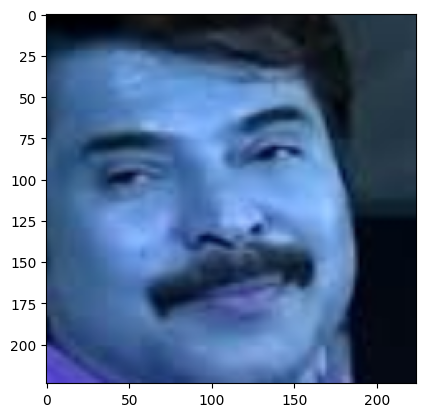

In [ ]:
#path = '/content/drive/MyDrive/dataset/mammooty/mammooty103.png'
result = modelv.predict([image('/content/drive/MyDrive/dataset/mammooty/mammooty1.png')])
if result[0][0] == 1:
    prediction = 'mamooty'
elif result[0][0] == 0:
    prediction = 'mohanlal'
else:
    prediction = 'I dont know this guy!'
print(prediction)
print(result)
print(path)

In [ ]:
scores = modelv.evaluate(X,y,verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
#to know accuracy of model

Accuracy: 98.80%
